In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

In [2]:
img_size = (150, 150)
batch_size = 32
data_dir = "image dataset"

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 1036 images belonging to 2 classes.
Found 258 images belonging to 2 classes.


In [4]:
#Build CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])


C:\Users\Hitarth\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [6]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=2
)

C:\Users\Hitarth\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 486ms/step - accuracy: 0.7494 - loss: 1.0339 - val_accuracy: 0.9031 - val_loss: 0.2843
Epoch 2/2
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 428ms/step - accuracy: 0.8815 - loss: 0.2803 - val_accuracy: 0.9302 - val_loss: 0.1589


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 18s 537ms/step - accuracy: 0.9686 - loss: 0.0921 - val_accuracy: 0.9845 - val_loss: 0.0440
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 441ms/step - accuracy: 0.9956 - loss: 0.0214 - val_accuracy: 0.9961 - val_loss: 0.0146
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 392ms/step - accuracy: 0.9972 - loss: 0.0137 - val_accuracy: 0.9961 - val_loss: 0.0105
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 428ms/step - accuracy: 0.9967 - loss: 0.0139 - val_accuracy: 0.9961 - val_loss: 0.0105
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 440ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 687ms/step - accuracy: 0.9971 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 445ms/step - accuracy: 0.9991 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 368ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accu

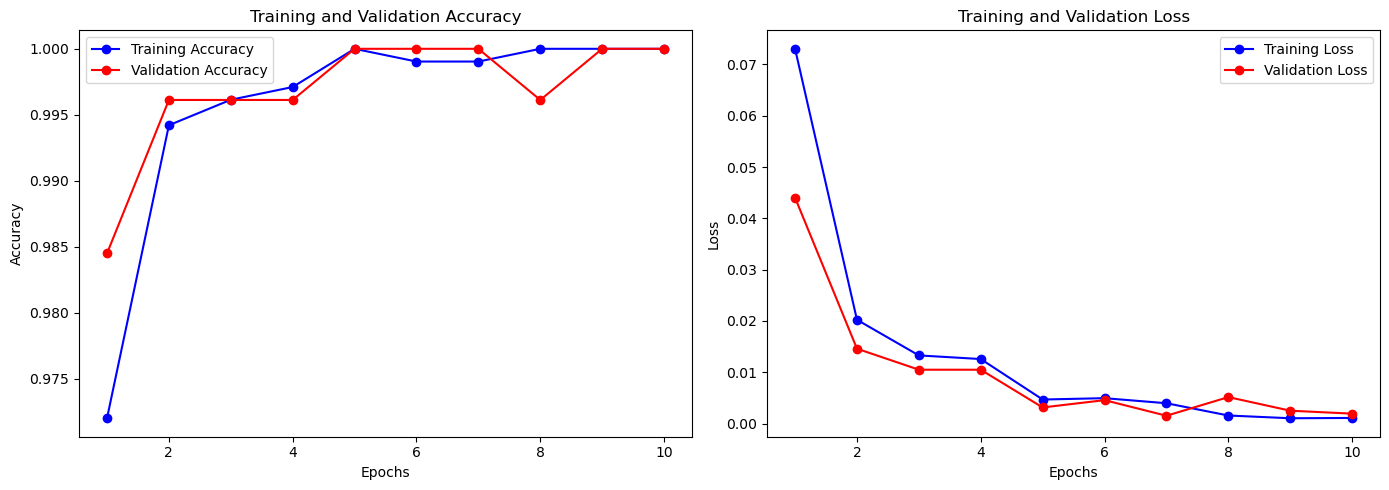

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

# Your history object from model.fit
history = model.fit(train_data, validation_data=val_data, epochs=10)

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 🧠 Call the function
plot_training_history(history)


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 664ms/step


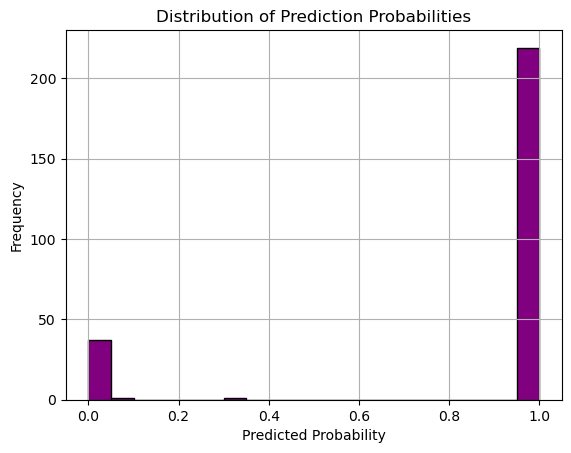

In [19]:
y_pred_probs = model.predict(val_data)
y_preds = (y_pred_probs > 0.5).astype("int32")

# Plot histogram of prediction probabilities
plt.hist(y_pred_probs, bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Prediction Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [8]:
# Save the model 
model.save("lung_cancer_cnn_model.h5")
print("Model saved as lung_cancer_cnn_model.h5")


Model saved as lung_cancer_cnn_model.h5
